<a href="https://colab.research.google.com/github/SiweiLuo/DL_with_Python/blob/master/14_deep_cmputer_vision_with_cnns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
#assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_random_seed(42)

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

1.14.0


In [0]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

In [0]:
import tensorflow as tf

In [0]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
image = china[150:220,130:250]

height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32) 
images = image_grayscale.reshape(1,height,width,1) 

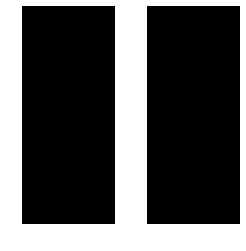

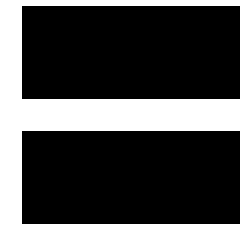

In [33]:
fmap = np.zeros(shape=(7,7,1,2),dtype=np.float32)
fmap[:,3,0,0] = 1 
fmap[3,:,0,1] = 1 
plot_image(fmap[:,:,0,0])
plt.show()
plot_image(fmap[:,:,0,1]) 
plt.show() 

In [0]:
reset_graph() 

x = tf.placeholder(tf.float32,shape=(None,height,width,1)) 
feature_maps = tf.constant(fmap) 
convolution = tf.nn.conv2d(x,feature_maps,strides=[1,1,1,1],padding="SAME")


In [0]:
with tf.Session() as sess: 
  output = convolution.eval(feed_dict={x:images}) 

Saving figure china_original


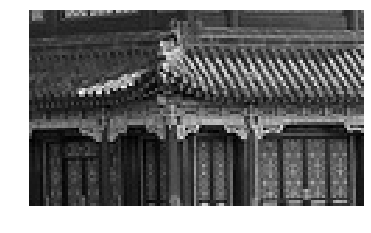

In [36]:
plot_image(images[0,:,:,0]) 
save_fig("china_original",tight_layout=False) 
plt.show() 

Saving figure china_vertical


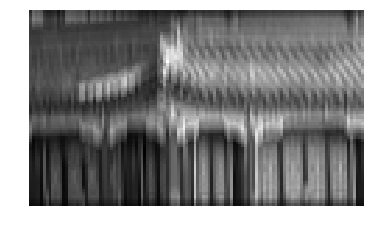

In [37]:
plot_image(output[0,:,:,0]) 
save_fig("china_vertical",tight_layout=False) 
plt.show() 

Saving figure china_horizontal


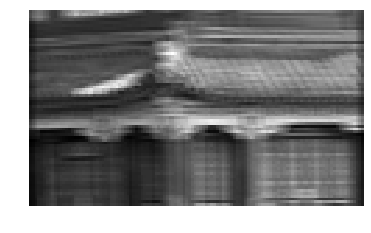

In [38]:
plot_image(output[0,:,:,1]) 
save_fig("china_horizontal",tight_layout=False)  
plt.show() 

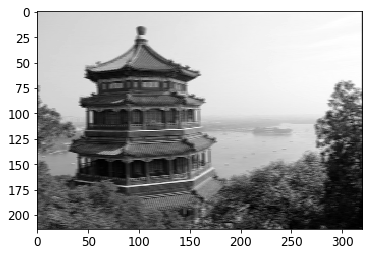

In [39]:
import numpy as np 
from sklearn.datasets import load_sample_images 

china = load_sample_image("china.jpg") 
flower = load_sample_image("flower.jpg") 
dataset = np.array([china,flower],dtype=np.float32) 
batch_size, height, width, channels = dataset.shape 

filters = np.zeros(shape=(7,7,channels,2),dtype=np.float32) 
filters[:,3,:,0] = 1  
filters[3,:,:,1] = 1

x = tf.placeholder(tf.float32,shape=(None,height,width,channels)) 
convolution = tf.nn.conv2d(x,filters,strides=[1,2,2,1],padding="SAME") 

with tf.Session() as sess: 
  output = sess.run(convolution,feed_dict={x:dataset})
  
plt.imshow(output[0,:,:,1],cmap="gray") 
plt.show() 
                   

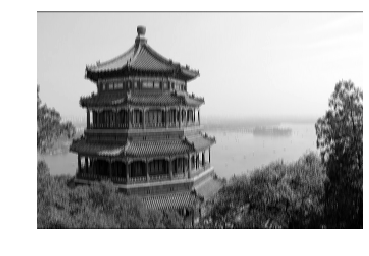

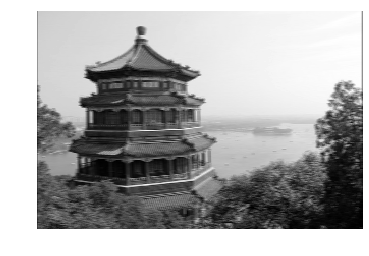

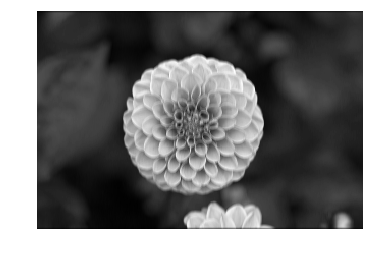

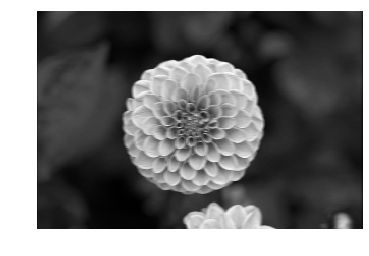

In [40]:
for image_index in (0,1):
  for feature_map_index in (0,1):
    plot_image(output[image_index,:,:,feature_map_index]) 
    plt.show() 

In [41]:
reset_graph() 

x = tf.placeholder(shape=(None,height,width,channels),dtype=tf.float32) 
conv = tf.layers.conv2d(x,filters=2,kernel_size=7,strides=[2,2],padding="SAME") 



W0714 22:22:25.398896 140423002138496 deprecation.py:323] From <ipython-input-41-8989d64c53b8>:4: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
W0714 22:22:25.407339 140423002138496 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
init = tf.global_variables_initializer() 

with tf.Session() as sess: 
  init.run() 
  output = sess.run(conv,feed_dict={x:dataset}) 

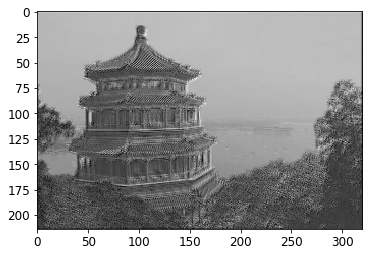

In [43]:
plt.imshow(output[0,:,:,1],cmap="gray") 
plt.show() 

In [45]:
reset_graph() 

filter_primes = np.array([2.,3.,5.,7.,11.,13.],dtype=np.float32) 
x = tf.constant(np.arange(1,13+1,dtype=np.float32).reshape([1,1,13,1]))
filters = tf.constant(filter_primes.reshape(1,6,1,1,)) 


valid_conv = tf.nn.conv2d(x,filters,strides=[1,1,5,1],padding="VALID")
same_conv = tf.nn.conv2d(x,filters,strides=[1,1,5,1],padding="SAME") 

with tf.Session() as sess: 
  print("VALID:\n",valid_conv.eval()) 
  print("SAME:\n",same_conv.eval()) 
                

VALID:
 [[[[184.]
   [389.]]]]
SAME:
 [[[[143.]
   [348.]
   [204.]]]]


In [46]:
print("VALID:") 
print(np.array([1,2,3,4,5,6]).T.dot(filter_primes)) 
print(np.array([6,7,8,9,10,11]).T.dot(filter_primes)) 
print("SAME:")
print(np.array([0,1,2,3,4,5]).T.dot(filter_primes))
print(np.array([5,6,7,8,9,10]).T.dot(filter_primes)) 
print(np.array([10,11,12,13,0,0]).T.dot(filter_primes)) 

VALID:
184.0
389.0
SAME:
143.0
348.0
204.0


In [0]:
batch_size, height, width, channels = dataset.shape 

filters = np.zeros(shape=(7,7,channels,2),dtype=np.float32) 
filters[:,3,:,0] = 1 
filters[3,:,:,1] = 1 



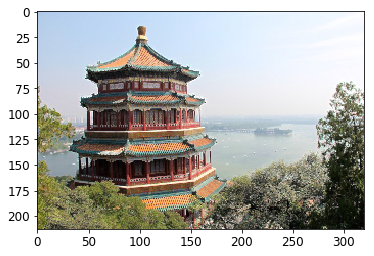

In [49]:
x = tf.placeholder(tf.float32,shape=(None,height,width,channels)) 
max_pool = tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding="VALID") 

with tf.Session() as sess: 
  output = sess.run(max_pool,feed_dict={x:dataset}) 
  
plt.imshow(output[0].astype(np.uint8))
plt.show() 

W0714 22:31:34.341622 140423002138496 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Saving figure china_original


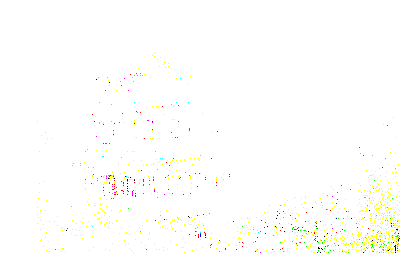

W0714 22:31:34.887979 140423002138496 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Saving figure china_max_pool


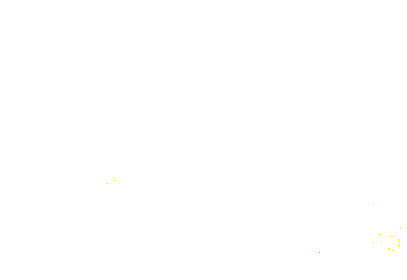

In [50]:
plot_color_image(dataset[0]) 
save_fig("china_original") 
plt.show() 

plot_color_image(output[0]) 
save_fig("china_max_pool") 
plt.show() 

In [53]:
height = 28 
width = 28 
channels = 1 
n_inputs = height*width 

conv1_fmaps = 32 
conv1_ksize = 3 
conv1_stride = 1 
conv1_pad = "SAME" 

conv2_fmaps = 64 
conv2_ksize = 3 
conv2_stride = 2 
conv2_pad = "SAME" 

pool3_fmaps = conv2_fmaps 

n_fc1 = 64 
n_outputs = 10 

reset_graph() 

with tf.name_scope("inputs"): 
  x = tf.placeholder(tf.float32,shape=[None,n_inputs],name="x") 
  x_reshaped = tf.reshape(x,shape=[-1,height,width,channels]) 
  y = tf.placeholder(tf.int32,shape=[None],name="y") 
  
conv1 = tf.layers.conv2d(x_reshaped,filters=conv1_fmaps,kernel_size=conv1_ksize,
                         strides=conv1_stride,padding=conv1_pad,
                         activation=tf.nn.relu,name="conv1")
conv2 = tf.layers.conv2d(conv1,filters=conv2_fmaps,kernel_size=conv2_ksize,
                         strides=conv2_stride,padding=conv2_pad,
                         activation=tf.nn.relu,name="conv2")

with tf.name_scope("pool3"):
  pool3 = tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding="VALID")
  pool3_flat = tf.reshape(pool3,shape=[-1,pool3_fmaps*7*7]) 
  
with tf.name_scope("fc1"): 
  fc1 = tf.layers.dense(pool3_flat,n_fc1,activation=tf.nn.relu,name="fc1")
  
with tf.name_scope("output"):
  logits = tf.layers.dense(fc1,n_outputs,name="output") 
  Y_proba = tf.nn.softmax(logits,name="Y_proba") 
  
with tf.name_scope("train"):
  xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits,labels=y)
  loss = tf.reduce_mean(xentropy) 
  optimizer = tf.train.AdamOptimizer() 
  training_op = optimizer.minimize(loss) 
  
with tf.name_scope("eval"):
  correct = tf.nn.in_top_k(logits,y,1) 
  accuracy = tf.reduce_mean(tf.cast(correct,tf.float32)) 
  
with tf.name_scope("init_and_save"):
  init = tf.global_variables_initializer() 
  saver = tf.train.Saver() 

W0714 22:42:18.547688 140423002138496 deprecation.py:323] From <ipython-input-53-74f9629a5f87>:40: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.


In [54]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data() 
x_train = x_train.astype(np.float32).reshape(-1,28*28) / 255
x_test = x_test.astype(np.float32).reshape(-1,28*28) /255 
y_train = y_train.astype(np.int32) 
y_test = y_test.astype(np.int32) 
x_valid,x_train = x_train[:5000],x_train[5000:]
y_valid,y_train = y_train[:5000],y_train[5000:] 



11493376/11490434 [==============================] - 0s 0us/step


In [0]:
def shuffle_batch(x,y,batch_size):
  rnd_idx = np.random.permutation(len(x)) 
  n_batches = len(x) // batch_size 
  for batch_idx in np.array_split(rnd_idx,n_batches):
    x_batch,y_batch = x[batch_idx],y[batch_idx]
    yield x_batch,y_batch 

In [0]:
n_epochs = 10 
batch_size = 100 

with tf.Session() as sess: 
  init.run() 
  for epoch in range(n_epochs): 
    for x_batch, y_batch in shuffle_batch(x_train,y_train,batch_size): 
      sess.run(training_op,feed_dict={x:x_batch,y:y_batch}) 
    acc_batch = accuracy.eval(feed_dict={x:x_batch,y:y_batch}) 
    acc_test = accuracy.eval(feed_dict={x:x_test,y:y_test}) 
    print(epoch, "Last batch accuracy:" , acc_batch, "test accuracy: ",acc_test) 

0 Last batch accuracy: 0.99 test accuracy:  0.9776
